### KNN Classification
Disease-healthy cells approach: For each cell in the query
dataset, we extract its k nearest neighbors in the reference and the corresponding Euclidean
distances, adjusted by a Gaussian kernel. We compute the probability of assigning 𝑃(𝑦|𝑐)
each label to the query cell by normalising across all adjusted distances. The label 𝑦 𝑐
uncertainty corresponds to 1 − 𝑚𝑎𝑥_𝑦 (𝑃(𝑦|𝑐))

Steps:
1. Get all the distances
2. Extract for each cell in the QUERY the k nearest neighbors in the REFERENCE
3. Compute prob of assigning each label to the query cell by normalising across all adjusted distances
   
   3.1. Normalize
   
    3.2 Compute prob
4. Choose the best prob => uncert is 1 - best prob

In [1]:
import os
os.chdir('../') 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
import scanpy as sc
import torch
import scarches as sca
from scarches.dataset.trvae.data_handling import remove_sparsity
import matplotlib.pyplot as plt
import numpy as np
import gdown
import anndata as ad
import pandas as pd

 captum (see https://github.com/pytorch/captum).
INFO:lightning_fabric.utilities.seed:Global seed set to 0
/home/alextopalova/miniconda3/envs/archmap/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from uncert_metric import *

In [4]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(12, 3))
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

In [5]:
condition_key = 'study'
cell_type_key = 'cell_type'
source_adata = sc.read("source/source__pancreas.h5ad")
target_adata = sc.read("target/target__pancreas.h5ad")
surgery_path = "surgery_model/surgery_model_pancreas"

In [6]:
model = sca.models.TRVAE.load(surgery_path, source_adata)

AnnData object with n_obs × n_vars = 10294 × 1000
    obs: 'batch', 'study', 'cell_type', 'size_factors'

INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 1000 128 5
	Hidden Layer 1 in/out: 128 128
	Mean/Var Layer in/out: 128 10
Decoder Architecture:
	First Layer in, out and cond:  10 128 5
	Hidden Layer 1 in/out: 128 128
	Output Layer in/out:  128 1000 



In [7]:
adata_ref_latent = sc.AnnData(model.get_latent(source_adata.X, source_adata.obs[condition_key]))
adata_ref_latent.obs['cell_type'] = source_adata.obs[cell_type_key].tolist()
adata_ref_latent.obs['batch'] = source_adata.obs[condition_key].tolist()

In [8]:
adata_query_latent = sc.AnnData(model.get_latent(target_adata.X, target_adata.obs[condition_key]))
adata_query_latent.obs['cell_type'] = target_adata.obs[cell_type_key].tolist()
adata_query_latent.obs['batch'] = target_adata.obs[condition_key].tolist()

In [16]:
uncertainties = classification_uncert_euclidean(
    adata_ref_latent = adata_ref_latent, 
    adata_query_latent = adata_query_latent
)

Weighted KNN with n_neighbors = 15 ... finished!


In [18]:
uncertainties["uncertainty"] = uncertainties["cell_type"]
uncertainties["batch"] = target_adata.obs[condition_key].tolist()
uncertainties["cell_type"] = target_adata.obs[cell_type_key].tolist()

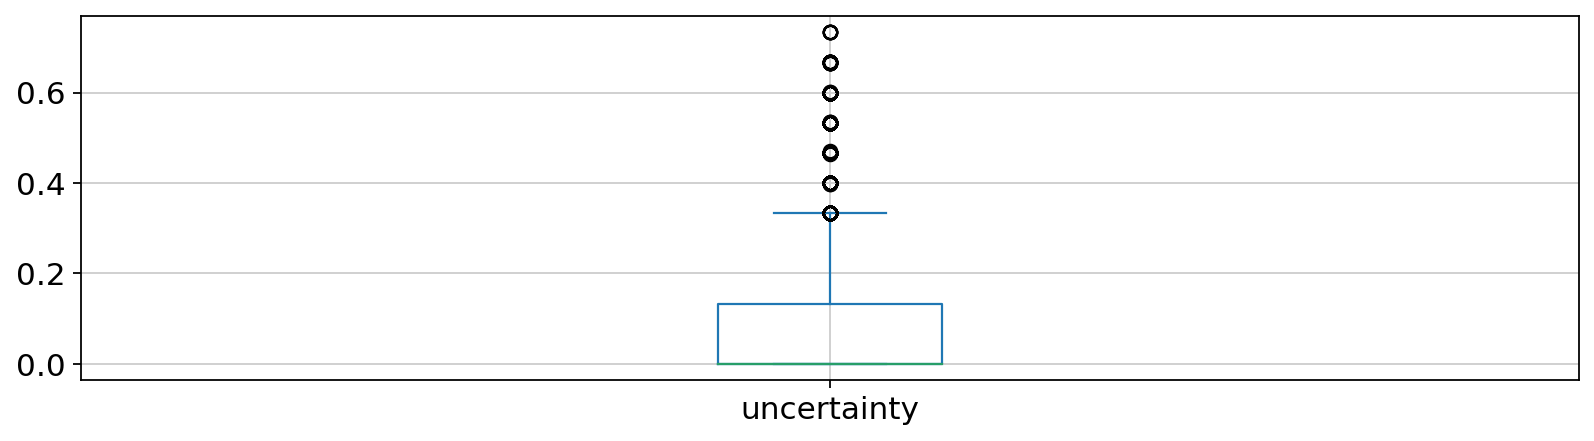

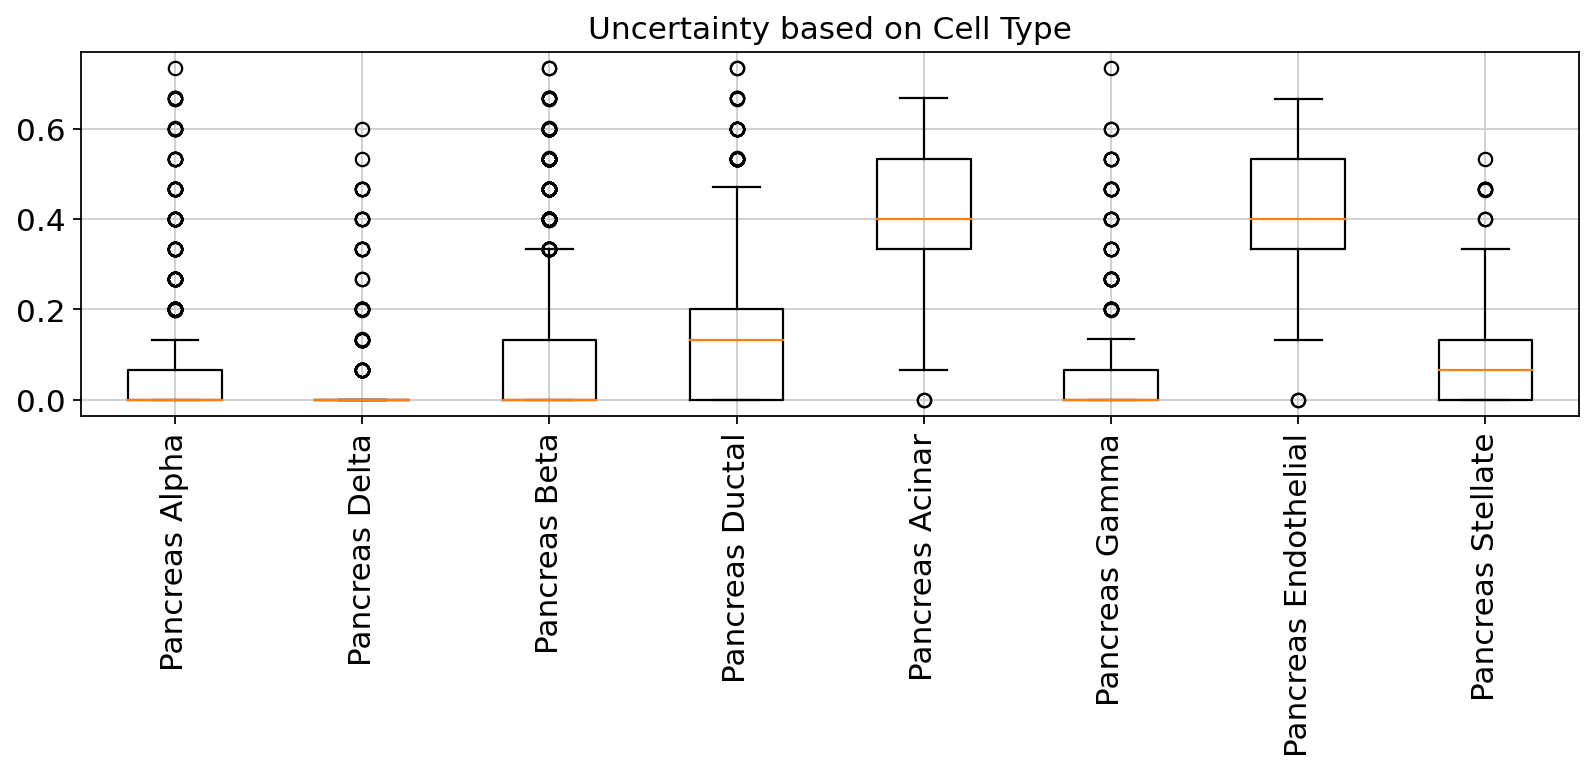

In [19]:
uncert_diagram(uncertainties)

In [22]:
condition_key = 'study'
cell_type_key = 'cell_type'
source_adata = sc.read("source/source__pancreas_no_alpha.h5ad")
target_adata = sc.read("target/target__pancreas_no_alpha.h5ad")
surgery_path = "surgery_model/surgery_model_pancreas_no_alpha"

In [23]:
model = sca.models.TRVAE.load(surgery_path, source_adata)

AnnData object with n_obs × n_vars = 7584 × 1000
    obs: 'batch', 'study', 'cell_type', 'size_factors'

INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 1000 128 5
	Hidden Layer 1 in/out: 128 128
	Mean/Var Layer in/out: 128 10
Decoder Architecture:
	First Layer in, out and cond:  10 128 5
	Hidden Layer 1 in/out: 128 128
	Output Layer in/out:  128 1000 



In [24]:
adata_ref_latent = sc.AnnData(model.get_latent(source_adata.X, source_adata.obs[condition_key]))
adata_ref_latent.obs['cell_type'] = source_adata.obs[cell_type_key].tolist()
adata_ref_latent.obs['batch'] = source_adata.obs[condition_key].tolist()

In [25]:
adata_query_latent = sc.AnnData(model.get_latent(target_adata.X, target_adata.obs[condition_key]))
adata_query_latent.obs['cell_type'] = target_adata.obs[cell_type_key].tolist()
adata_query_latent.obs['batch'] = target_adata.obs[condition_key].tolist()

In [26]:
uncertainties = classification_uncert_euclidean(
    adata_ref_latent = adata_ref_latent, 
    adata_query_latent = adata_query_latent
)

Weighted KNN with n_neighbors = 15 ... finished!


In [27]:
uncertainties["uncertainty"] = uncertainties["cell_type"]
uncertainties["batch"] = target_adata.obs[condition_key].tolist()
uncertainties["cell_type"] = target_adata.obs[cell_type_key].tolist()

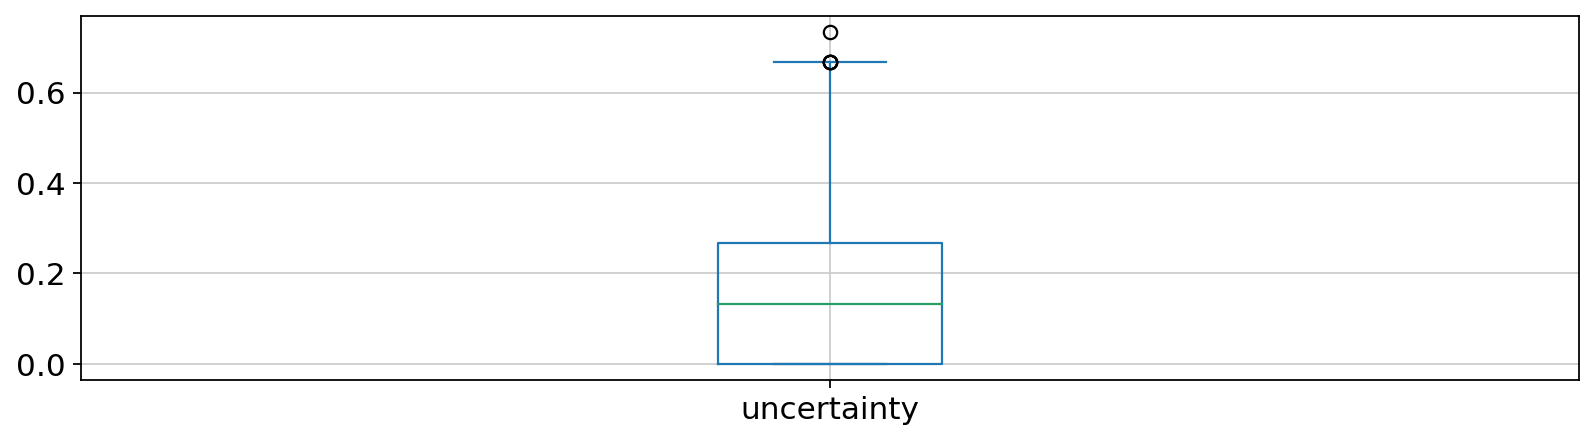

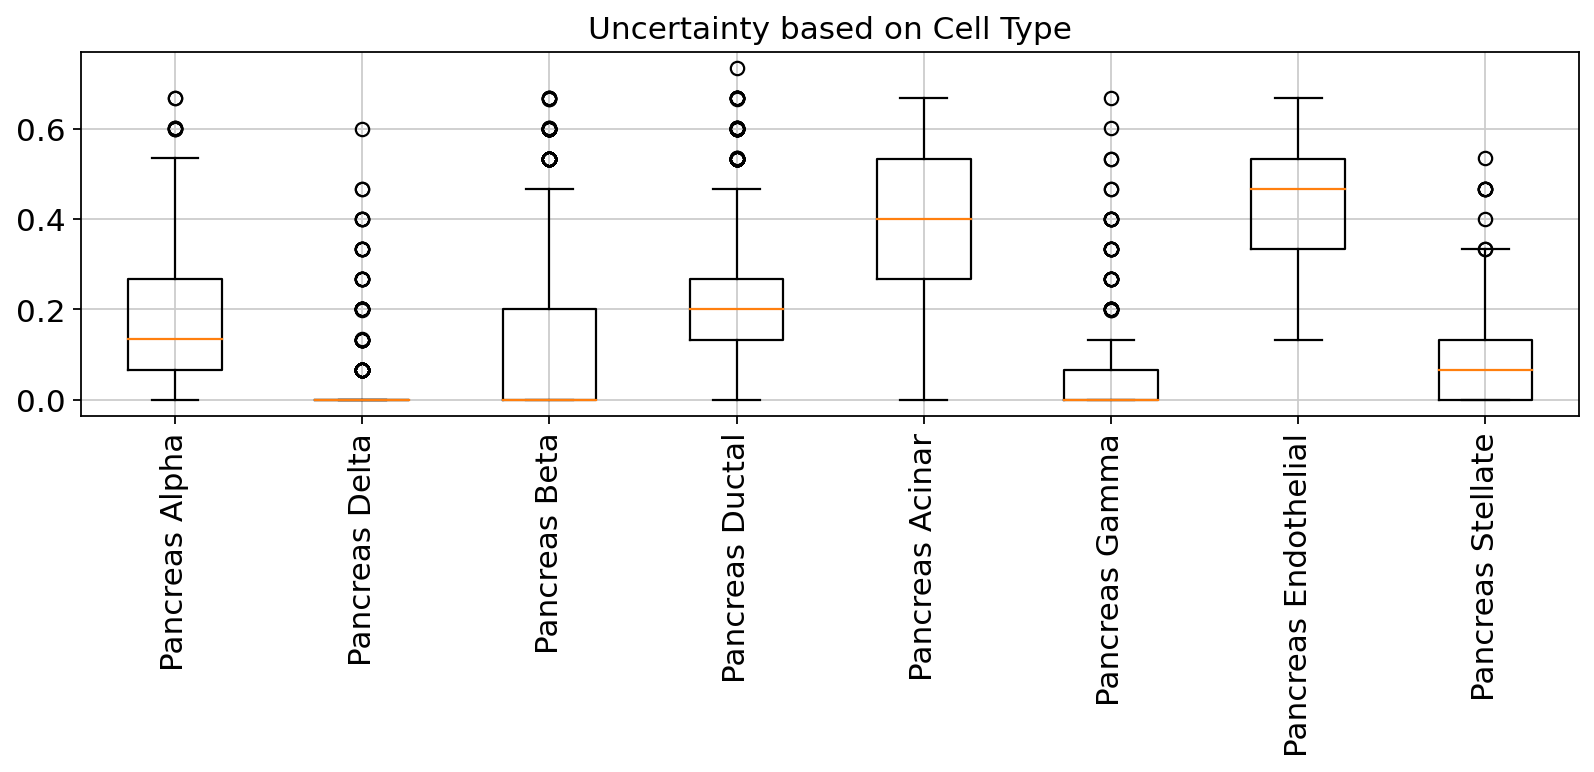

In [28]:
uncert_diagram(uncertainties)

In [35]:
condition_key = 'batch' 
cell_type_key = 'final_annotation'
source_adata = sc.read("source/source__pbmc.h5ad")
target_adata = sc.read("target/target__pbmc.h5ad")
surgery_path = "surgery_model/surgery_model_pbmc"

In [36]:
model = sca.models.TRVAE.load(surgery_path, source_adata)

AnnData object with n_obs × n_vars = 29195 × 12303
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue'
    layers: 'counts'

INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 12303 128 10
	Hidden Layer 1 in/out: 128 128
	Mean/Var Layer in/out: 128 10
Decoder Architecture:
	First Layer in, out and cond:  10 128 10
	Hidden Layer 1 in/out: 128 128
	Output Layer in/out:  128 12303 



In [37]:
adata_ref_latent = sc.AnnData(model.get_latent(source_adata.X, source_adata.obs[condition_key]))
adata_ref_latent.obs['cell_type'] = source_adata.obs[cell_type_key].tolist()
adata_ref_latent.obs['batch'] = source_adata.obs[condition_key].tolist()

In [38]:
adata_query_latent = sc.AnnData(model.get_latent(target_adata.X, target_adata.obs[condition_key]))
adata_query_latent.obs['cell_type'] = target_adata.obs[cell_type_key].tolist()
adata_query_latent.obs['batch'] = target_adata.obs[condition_key].tolist()

In [39]:
uncertainties = classification_uncert_euclidean(
    adata_ref_latent = adata_ref_latent, 
    adata_query_latent = adata_query_latent
)

Weighted KNN with n_neighbors = 15 ... finished!


In [40]:
uncertainties["uncertainty"] = uncertainties["cell_type"]
uncertainties["batch"] = target_adata.obs[condition_key].tolist()
uncertainties["cell_type"] = target_adata.obs[cell_type_key].tolist()

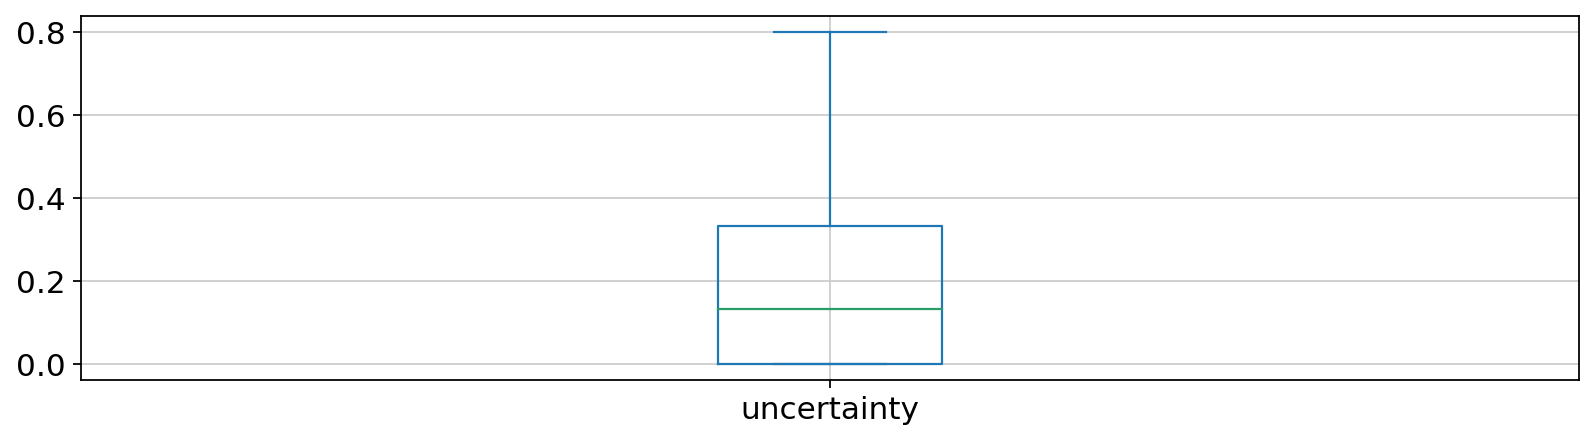

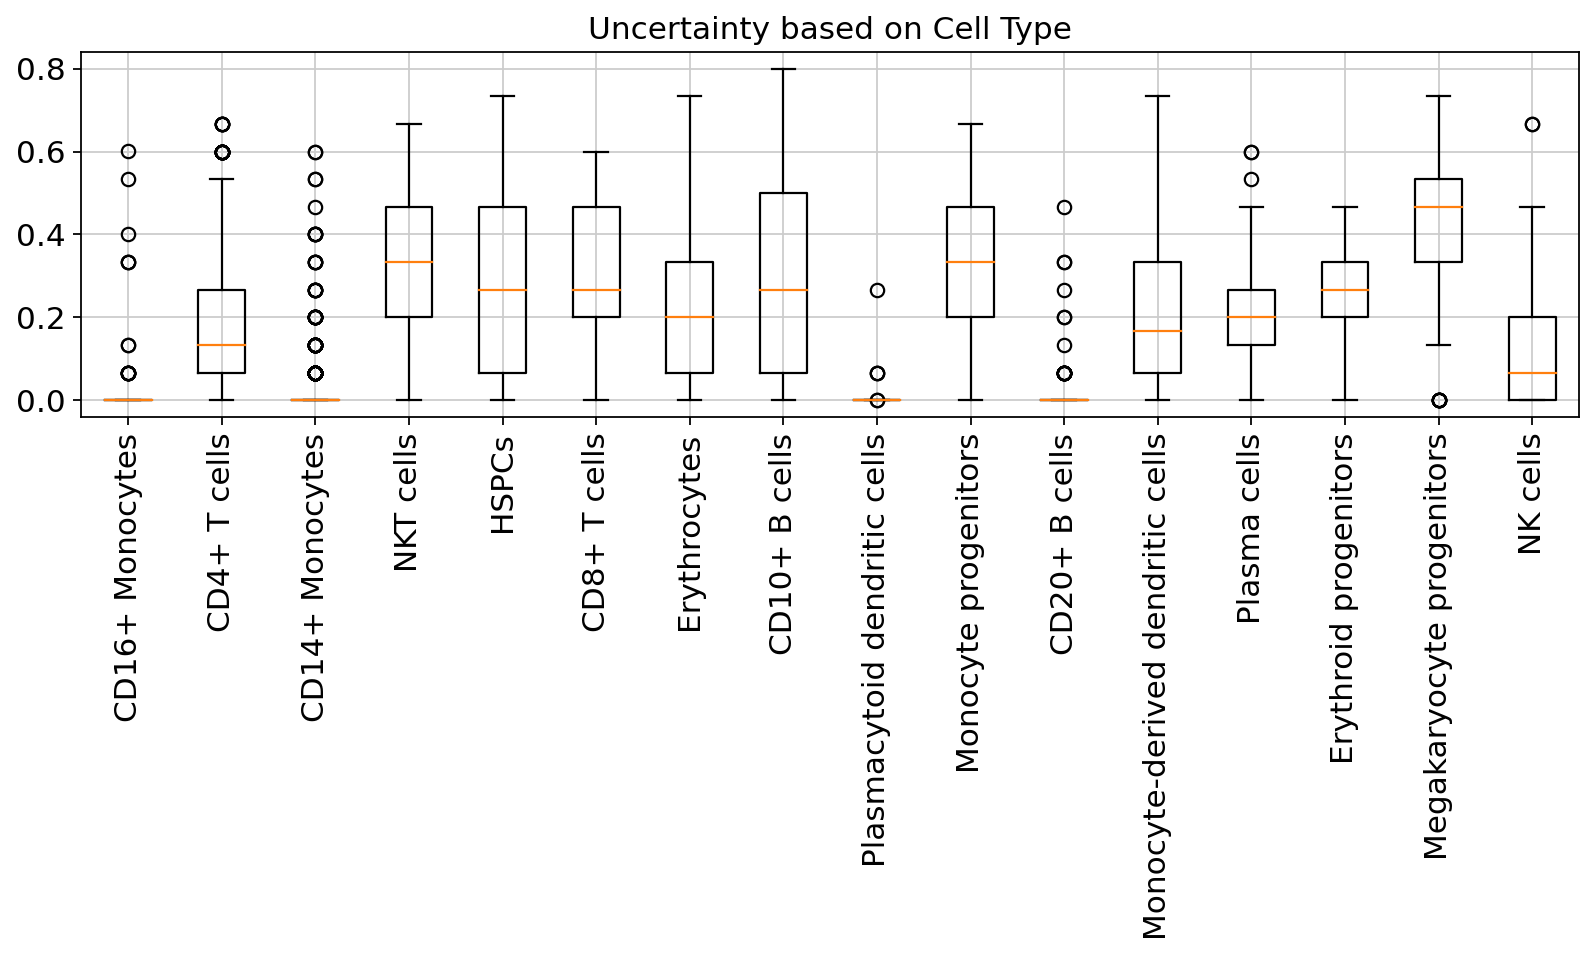

In [41]:
uncert_diagram(uncertainties)

In [42]:
condition_key = 'batch' 
cell_type_key = 'final_annotation'
source_adata = sc.read("source/source__pbmc_10x_villani.h5ad")
target_adata = sc.read("target/target__pbmc_10x_villani.h5ad")
surgery_path = "surgery_model/surgery_model_pbmc_10x_villani"

In [43]:
model = sca.models.TRVAE.load(surgery_path, source_adata)

AnnData object with n_obs × n_vars = 21757 × 12303
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue'
    layers: 'counts'

INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 12303 128 10
	Hidden Layer 1 in/out: 128 128
	Mean/Var Layer in/out: 128 10
Decoder Architecture:
	First Layer in, out and cond:  10 128 10
	Hidden Layer 1 in/out: 128 128
	Output Layer in/out:  128 12303 



In [44]:
adata_ref_latent = sc.AnnData(model.get_latent(source_adata.X, source_adata.obs[condition_key]))
adata_ref_latent.obs['cell_type'] = source_adata.obs[cell_type_key].tolist()
adata_ref_latent.obs['batch'] = source_adata.obs[condition_key].tolist()

In [45]:
adata_query_latent = sc.AnnData(model.get_latent(target_adata.X, target_adata.obs[condition_key]))
adata_query_latent.obs['cell_type'] = target_adata.obs[cell_type_key].tolist()
adata_query_latent.obs['batch'] = target_adata.obs[condition_key].tolist()

In [46]:
uncertainties = classification_uncert_euclidean(
    adata_ref_latent = adata_ref_latent, 
    adata_query_latent = adata_query_latent
)

Weighted KNN with n_neighbors = 15 ... finished!


In [47]:
uncertainties["uncertainty"] = uncertainties["cell_type"]
uncertainties["batch"] = target_adata.obs[condition_key].tolist()
uncertainties["cell_type"] = target_adata.obs[cell_type_key].tolist()

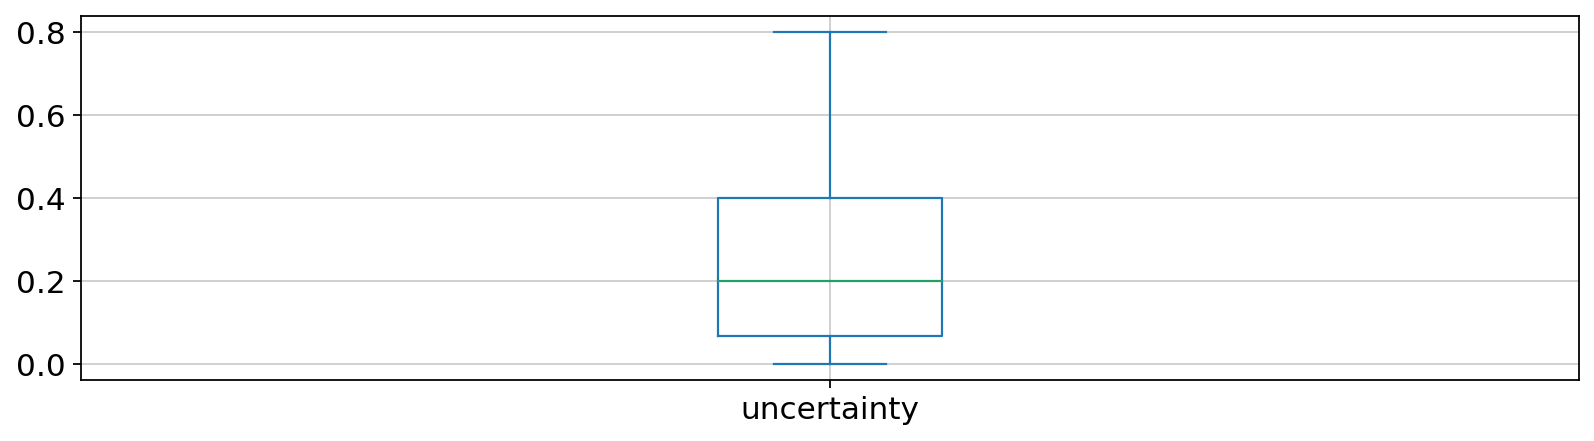

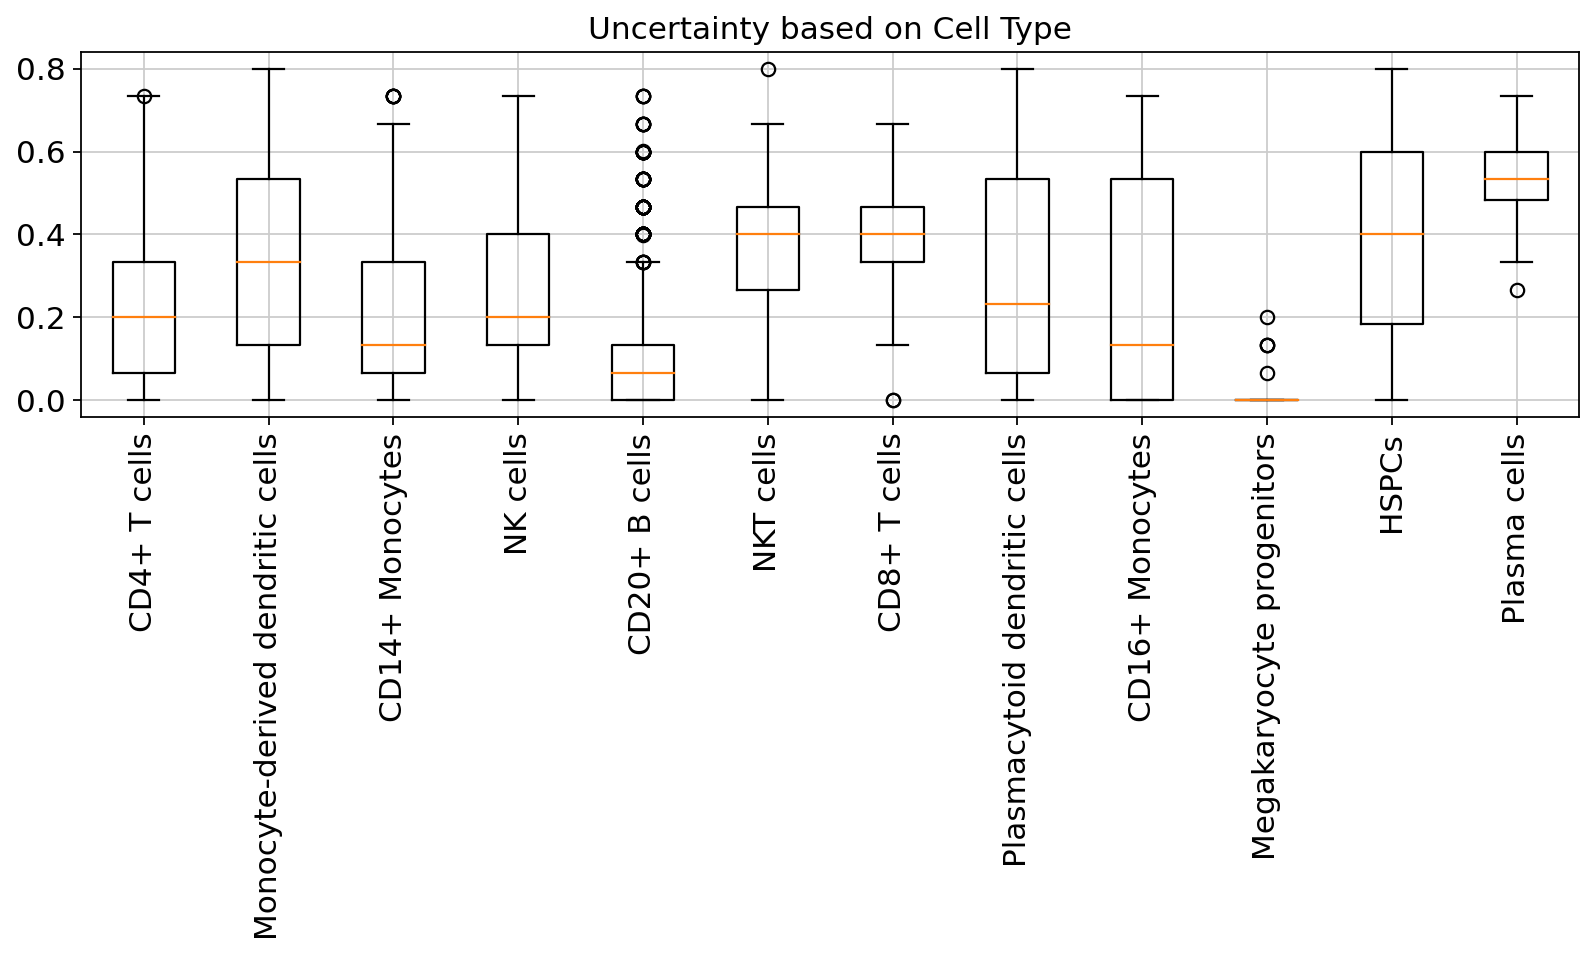

In [48]:
uncert_diagram(uncertainties)